## **k-nearest neighbors (KNN) Algorithm.**


#### The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.

## KNN for Zoo dataset
Implement a KNN model to classify the animals in to categories

In [16]:
#Importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")                       #To ignore unecessary warnings

from sklearn.neighbors import KNeighborsClassifier      #To bulid the KNN model
from sklearn.metrics import *                           #To evaluate the model
from sklearn.model_selection import train_test_split    #To divide the dataset into training and testing

from sklearn.preprocessing import MinMaxScaler          #For scaling the data

In [17]:
#importing dataset

animals_df=pd.read_csv("Zoo.csv")
animals_df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


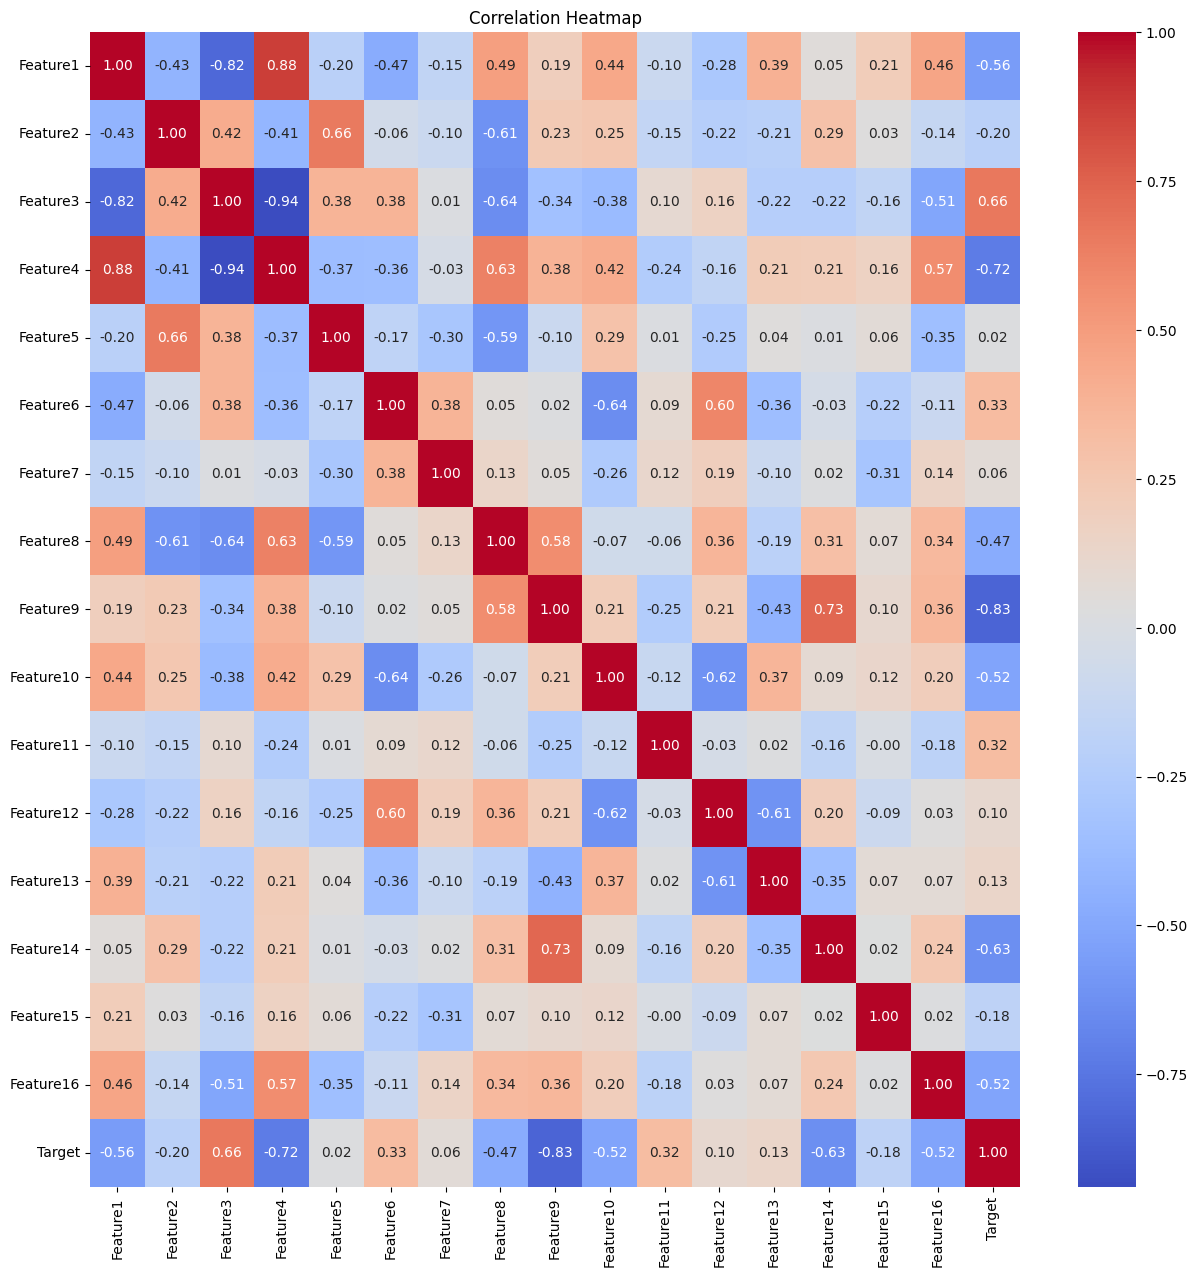

In [26]:

# Create a sample DataFrame
data = pd.DataFrame({
    'Feature1': animals_df['hair'],
    'Feature2': animals_df['feathers'],
    'Feature3': animals_df['eggs'],
    'Feature4': animals_df['milk'],
    'Feature5': animals_df['airborne'],
    'Feature6': animals_df['aquatic'],
    'Feature7': animals_df['predator'],
    'Feature8': animals_df['toothed'],
    'Feature9': animals_df['backbone'],
    'Feature10': animals_df['breathes'],
    'Feature11': animals_df['venomous'],
    'Feature12': animals_df['fins'],
    'Feature13': animals_df['legs'],
    'Feature14': animals_df['tail'],
    'Feature15': animals_df['domestic'],
    'Feature16': animals_df['catsize'],
    'Target': animals_df['type']
})

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # annot=True adds values to cells
plt.title('Correlation Heatmap')
plt.show()


In [3]:
# To check null value

animals_df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [4]:
#No null value in the data.

In [5]:
animals_df.shape

(101, 18)

In [6]:
animals_df['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

 This is the imbalanced data<br>
 Now we will look for f1-score of the data

In [7]:
# x-independent variable--features of an animal
# y-dependent variable--name of an animal

x=animals_df.iloc[:,1:17]
y=animals_df.iloc[:,17]
#print(x)
#print(y)

In [9]:
x.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize'],
      dtype='object')

Scaling data-so that each column will be treat equally.<br>
using MinMax Scaler

In [8]:
scaler=MinMaxScaler()
scaled_features=scaler.fit_transform(x)

Spliting data for training nad testing in ratio 8:2<br>
training data-> 80% of total data<br>
testing data -> 20% of total data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(scaled_features,y,test_size=0.2,random_state=10)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(80, 16)
(21, 16)
(80,)
(21, 16)


## **Model**

In [ ]:
model1=KNeighborsClassifier(n_neighbors=3)
model1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred1=model1.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       0.75      1.00      0.86         3
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       0.67      1.00      0.80         2
           7       1.00      0.67      0.80         3

    accuracy                           0.90        21
   macro avg       0.77      0.81      0.78        21
weighted avg       0.88      0.90      0.88        21



Comment:-

> Accuracy by model-1 ->90%

> model needs modification

In [ ]:
model2=KNeighborsClassifier(n_neighbors=5)
model2.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred2=model2.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           1       1.00      0.71      0.83         7
           2       0.75      1.00      0.86         3
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         4
           5       1.00      1.00      1.00         1
           6       0.67      1.00      0.80         2
           7       1.00      0.67      0.80         3

    accuracy                           0.81        21
   macro avg       0.73      0.77      0.73        21
weighted avg       0.82      0.81      0.79        21



Comment:-

> Accuracy by model-2 ->81%

> model needs modification

In [ ]:
#further modification using loop

a=[]

for k in range(1,30,2):
  model=KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  a.append(accuracy_score(y_test,y_pred))

a

[0.9523809523809523,
 0.9047619047619048,
 0.8095238095238095,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.7619047619047619,
 0.8095238095238095,
 0.7619047619047619,
 0.7142857142857143,
 0.6666666666666666]

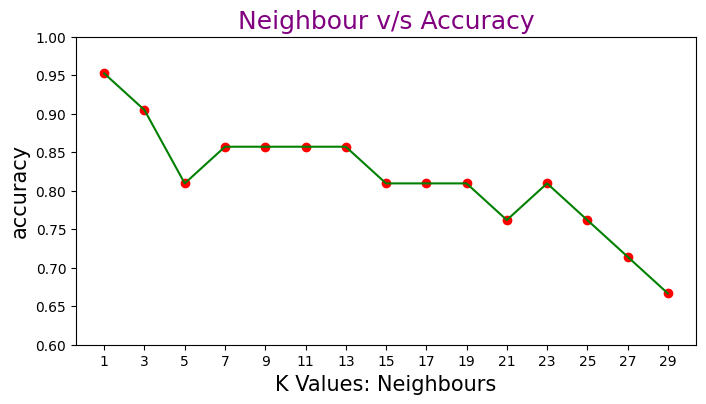

In [ ]:
#Plotting Accuracy

plt.figure(figsize=(8,4))
plt.scatter(range(1,30,2),a,color="red")
plt.plot(range(1,30,2),a,color="green")
plt.ylim(0.6,1)
plt.xticks(range(1,30,2))
plt.title("Neighbour v/s Accuracy",size=18,color="purple")
plt.xlabel("K Values: Neighbours",size=15)
plt.ylabel("accuracy",size=15)

plt.show()

highest accuracy is 0.9523809523809523 for n=1

#KNN for Glass dataset

Prepare a model for glass classification using KNN


Data Description:

> RI : refractive index<br>
> Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)<br>
> Mg: Magnesium<br>
> AI: Aluminum<br>
> Si: Silicon<br>
> K:Potassium<br>
> Ca: Calcium<br>
> Ba: Barium<br>
> Fe: Iron

Type: Type of glass: (class attribute)<br>
* 1 -- building_windows_float_processed<br>
* 2 --building_windows_non_float_processed<br>
* 3 --vehicle_windows_float_processed<br>
* 4 --vehicle_windows_non_float_processed (none in this database)<br>
* 5 --containers<br>
* 6 --tableware<br>
* 7 --headlamps







In [20]:
#Importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")                       #To ignore unecessary warnings

from sklearn.neighbors import KNeighborsClassifier      #To bulid the KNN model
from sklearn.metrics import *                           #To evaluate the model
from sklearn.model_selection import train_test_split    #To divide the dataset into training and testing

from sklearn.preprocessing import MinMaxScaler          #For scaling the data

In [21]:
#Importing dataset

glass_df=pd.read_csv("glass.csv")
glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


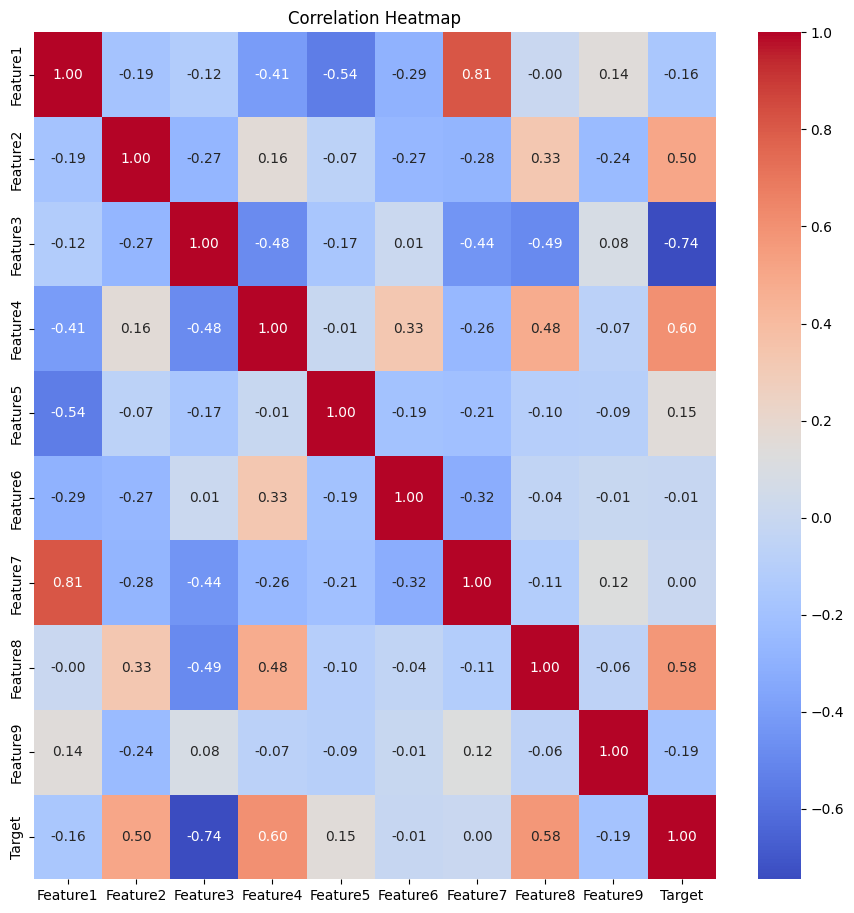

In [25]:

# Create a sample DataFrame
data = pd.DataFrame({
    'Feature1': glass_df['RI'],
    'Feature2': glass_df['Na'],
    'Feature3': glass_df['Mg'],
    'Feature4': glass_df['Al'],
    'Feature5': glass_df['Si'],
    'Feature6': glass_df['K'],
    'Feature7': glass_df['Ca'],
    'Feature8': glass_df['Ba'],
    'Feature9': glass_df['Fe'],
    'Target': glass_df['Type']
})

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(11,11))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # annot=True adds values to cells
plt.title('Correlation Heatmap')
plt.show()


**Exploratory data analysis (EDA)**

In [ ]:
# To check null value


glass_df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
glass_df.shape

(214, 10)

Comment:
> Data doesn't contain any null value.<br>
> There are 214 rows and 10 columns in the data.

In [ ]:
glass_df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

Comment:
> Data is Imbalanced<BR>
> Therefore we look for f1-score or Recall or Precision.

In [ ]:
# x-Independent variable->all columns are feature of type of glass except 'Type' column
# y-Dependent variable-> 'Type' of glass is target variable

x=glass_df.iloc[:,:9]
y=glass_df.iloc[:,9]
#print(x)
#print(y)

Comment:
> we get Dependent and Independent variable from the data <br>

> Now ,we 'Scale the features' using MinMax Scaler <br>
> Scaling of data is important so that each column will be treat equally.<br>

In [ ]:
#Scaling

scaler=MinMaxScaler()
scaled_x=scaler.fit_transform(x)

Comment:

> Spliting data for training nad testing in ratio 8:2<br>
training data-> 80% of total no of rows in the data<br>
testing data -> 20% of total no of rows in the data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size=0.2,random_state=10)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(171, 9)
(43, 9)
(171,)
(43, 9)


#### **Modeling**

In [ ]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_hat=model.predict(x_test)

#### **Evaluation of Model**

In [ ]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           1       0.56      0.53      0.55        17
           2       0.41      0.69      0.51        13
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       0.60      0.75      0.67         4

    accuracy                           0.49        43
   macro avg       0.26      0.33      0.29        43
weighted avg       0.40      0.49      0.43        43



In [ ]:
accuracy_score(y_test,y_hat)

0.4883720930232558

> we will look for only f1-score as the data is Imbalanced<br>

> This is MULTI-CLASS CLASSIFICATION Problem:

In [ ]:
#for f1-score


f=[]

for k in range(1,30,2):
  model=KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train,y_train)
  y_hat=model.predict(x_test)
  f.append(f1_score(y_test,y_hat,average='micro'))

f

[0.5348837209302325,
 0.5581395348837209,
 0.5348837209302325,
 0.4883720930232558,
 0.5116279069767442,
 0.4418604651162791,
 0.5116279069767442,
 0.5348837209302325,
 0.5116279069767442,
 0.5813953488372093,
 0.5581395348837209,
 0.5348837209302325,
 0.5348837209302325,
 0.5116279069767442,
 0.4883720930232558]

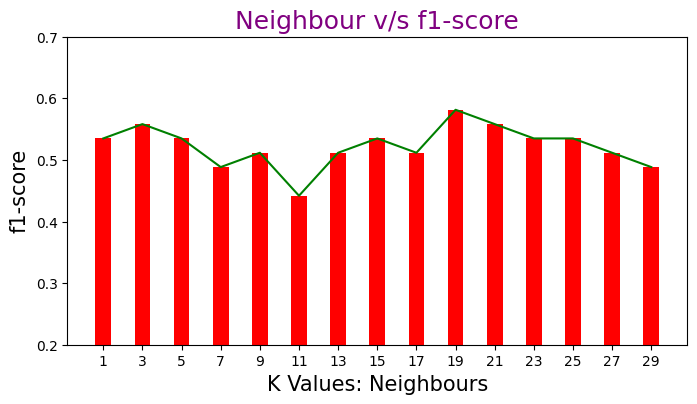

In [ ]:
plt.figure(figsize=(8,4))
plt.bar(range(1,30,2),f,color="red")
plt.plot(range(1,30,2),f,color="green")
plt.xticks(range(1,30,2))
plt.ylim(0.2,0.7)
plt.title("Neighbour v/s f1-score",size=18,color="purple")
plt.xlabel("K Values: Neighbours",size=15)
plt.ylabel("f1-score",size=15)

plt.show()

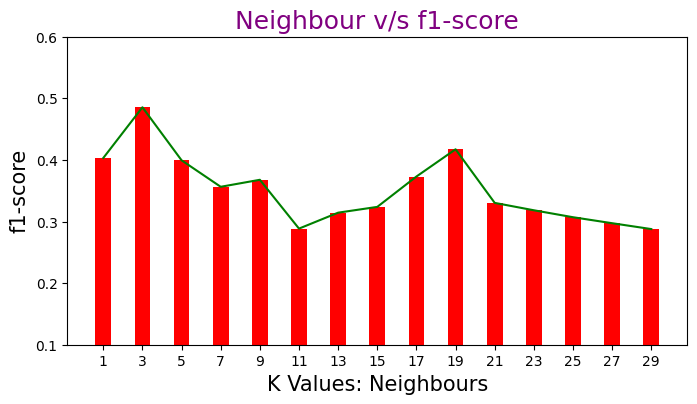

[0.40314674256799493,
 0.4854725415070243,
 0.39938645542093815,
 0.35637254901960785,
 0.3677476737821565,
 0.28850411132194814,
 0.3143667861409797,
 0.3237522281639929,
 0.3730392156862745,
 0.4172619047619048,
 0.3302631578947368,
 0.3182654216185625,
 0.3069844037585973,
 0.2972582972582973,
 0.2877344877344877]

In [ ]:
#for f1-score


f=[]

for k in range(1,30,2):
  model=KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train,y_train)
  y_hat=model.predict(x_test)
  f.append(f1_score(y_test,y_hat,average='macro'))



plt.figure(figsize=(8,4))
plt.bar(range(1,30,2),f,color="red")
plt.plot(range(1,30,2),f,color="green")
plt.xticks(range(1,30,2))
plt.ylim(0.1,0.6)
plt.title("Neighbour v/s f1-score",size=18,color="purple")
plt.xlabel("K Values: Neighbours",size=15)
plt.ylabel("f1-score",size=15)
plt.show()


f

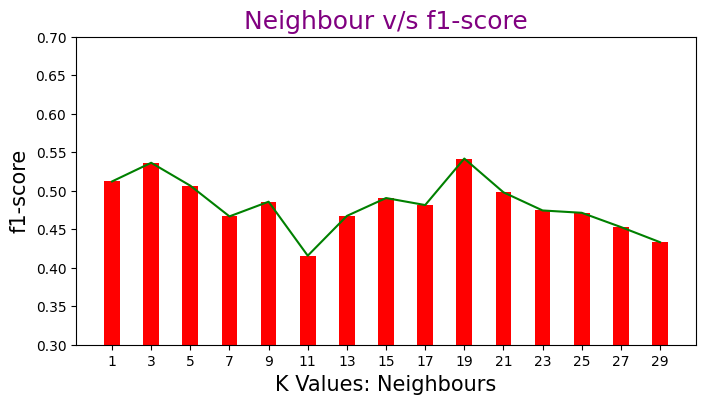

[0.5120471294294161,
 0.5363093646974962,
 0.5065237651444549,
 0.4666666666666667,
 0.4857371978462596,
 0.4156039009752438,
 0.4672834875385513,
 0.49048625792811845,
 0.4813953488372093,
 0.5417774086378737,
 0.4979192166462667,
 0.47435543096300387,
 0.47133404972864834,
 0.45283398771770866,
 0.4331420517467029]

In [ ]:
#for f1-score


f=[]

for k in range(1,30,2):
  model=KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train,y_train)
  y_hat=model.predict(x_test)
  f.append(f1_score(y_test,y_hat,average='weighted'))



plt.figure(figsize=(8,4))
plt.bar(range(1,30,2),f,color="red")
plt.plot(range(1,30,2),f,color="green")
plt.xticks(range(1,30,2))
plt.title("Neighbour v/s f1-score",size=18,color="purple")
plt.ylim(0.3,0.7)
plt.xlabel("K Values: Neighbours",size=15)
plt.ylabel("f1-score",size=15)
plt.show()


f



> Mirco average is the precision/recall/f1-score calculated for all the classes.<br>
>  Macro average is the average of precision/recall/f1-score. <br>
> Weighted average is just the weighted average of precision/recall/f1-score


>Macro-averaged: all classes equally contribute to the final averaged metric. <br>
Weighted-averaged: each classes's contribution to the average is weighted by its size.

Therefore we look for macro f1-score:<br>
which is 0.4854725415070243 for n=3